# Taller Clasificatorio - Dataset Back Costumer

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [5]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix as plt_cm

In [6]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

## Importar Dataset

In [7]:
path = "https://raw.githubusercontent.com/carlos-paezf/ML_Python/main/Segundo_Corte/Datasets/Bank/BankCustomerData.csv"
bank = pd.read_csv(path, encoding="utf-8")

## Función para las gráficas

In [8]:
def graphic(graphic, df, data=None, target=None, nrows=1, ncols=1, size=(10, 10)):
    if graphic == 'pairplot':
        sns.pairplot(df, diag_kind='hist', height=3.5, hue=target)

    else:
        fig, ax = plt.subplots(nrows, ncols, figsize=size)
        
        if graphic == 'heatmap':
            sns.heatmap(df.isna(), cbar=False, cmap='viridis')

        elif graphic == 'correlation':
            sns.heatmap(df.corr(), annot=True, annot_kws={'size':12}, cbar=True)

        else:
            index = 0

            for i in range(nrows):
                for j in range(ncols):
                    if graphic == 'histplot':
                        sns.histplot(
                            df[data[index]], 
                            ax=ax[i][j], 
                            kde=True, 
                            stat='density', 
                            color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]["color"]
                        )

                    elif graphic == 'boxplot':
                        sns.boxplot(
                            x=target, 
                            y=df[data[index]], 
                            data=df, 
                            ax=ax[i][j], 
                            color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]["color"]
                        )

                    elif graphic == 'barplot':
                        sns.barplot(
                            x=target, 
                            y=df[data[index]], 
                            data=df, 
                            ax=ax[i][j], 
                            color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]["color"]
                        )

                    elif graphic == 'violinplot':
                        sns.violinplot(
                            x=target, 
                            y=df[data[index]], 
                            data=df, 
                            hue=target, 
                            palette="Set2", 
                            split=True, 
                            inner='quartile', 
                            ax=ax[i][j]
                        )

                    index += 1
            plt.tight_layout()

## Conocer la Data

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [10]:
bank.describe()

age        balance  ...         pdays      previous
count  42639.000000   42639.000000  ...  42639.000000  42639.000000
mean      40.788808    1331.863951  ...     34.169141      0.465442
std       10.200236    3011.537676  ...     92.041713      2.166705
min       18.000000   -8019.000000  ...     -1.000000      0.000000
25%       33.000000      62.000000  ...     -1.000000      0.000000
50%       39.000000     429.000000  ...     -1.000000      0.000000
75%       48.000000    1381.500000  ...     -1.000000      0.000000
max       95.000000  102127.000000  ...    536.000000    275.000000

[8 rows x 7 columns]

In [11]:
bank.describe(include=['object'])

job  marital  education  ...  month poutcome term_deposit
count         42639    42639      42639  ...  42639    42639        42639
unique           12        3          4  ...     12        4            2
top     blue-collar  married  secondary  ...    may  unknown           no
freq           9536    25868      22066  ...  13532    36085        38678

[4 rows x 10 columns]

In [12]:
bank.describe(include='all')

age          job  marital  ...      previous poutcome  term_deposit
count   42639.000000        42639    42639  ...  42639.000000    42639         42639
unique           NaN           12        3  ...           NaN        4             2
top              NaN  blue-collar  married  ...           NaN  unknown            no
freq             NaN         9536    25868  ...           NaN    36085         38678
mean       40.788808          NaN      NaN  ...      0.465442      NaN           NaN
std        10.200236          NaN      NaN  ...      2.166705      NaN           NaN
min        18.000000          NaN      NaN  ...      0.000000      NaN           NaN
25%        33.000000          NaN      NaN  ...      0.000000      NaN           NaN
50%        39.000000          NaN      NaN  ...      0.000000      NaN           NaN
75%        48.000000          NaN      NaN  ...      0.000000      NaN           NaN
max        95.000000          NaN      NaN  ...    275.000000      NaN           NaN

[11 rows x 17 columns]

In [13]:
bank.head()

age           job  marital  education  ... pdays  previous poutcome term_deposit
0   58    management  married   tertiary  ...    -1         0  unknown           no
1   44    technician   single  secondary  ...    -1         0  unknown           no
2   33  entrepreneur  married  secondary  ...    -1         0  unknown           no
3   47   blue-collar  married    unknown  ...    -1         0  unknown           no
4   33       unknown   single    unknown  ...    -1         0  unknown           no

[5 rows x 17 columns]

In [14]:
bank.tail()

age          job  marital  ... previous poutcome  term_deposit
42634   21      student   single  ...        1  success           yes
42635   87      retired  married  ...        0  unknown           yes
42636   34  blue-collar  married  ...        1    other            no
42637   22      student   single  ...        0  unknown           yes
42638   32   management   single  ...        0  unknown            no

[5 rows x 17 columns]

## Convertir data categorica a numerica

In [15]:
month = {
    'jan' : 1,
    'feb' : 2,
    'mar' : 3,
    'apr' : 4,
    'may' : 5,
    'jun' : 6,
    'jul' : 7,
    'aug' : 8,
    'sep' : 9,
    'oct' : 10,
    'nov' : 11,
    'dec' : 12
}

bank['month'] = bank['month'].map(month).astype('int')

In [16]:
def categorical_to_numerical(col):
    dic_numerical = {}
    categorical = bank[col].unique()
    categorical.sort()
    for i in range(len(categorical)):
        dic_numerical[categorical[i]] = i
    bank[col] = bank[col].map(dic_numerical).astype('int')
    return dic_numerical

In [17]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'term_deposit']

for i in cols:
    print(categorical_to_numerical(i))

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
{'divorced': 0, 'married': 1, 'single': 2}
{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'cellular': 0, 'telephone': 1, 'unknown': 2}
{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}
{'no': 0, 'yes': 1}


## Convertir unknown en NaN

He decidido convertir todos los datos que sean de tipo `unknown` en tipo `None` puesto que si dejo dichos datos con la categoría imputada en el paso anterior, el dataset sería sesgado en varias columnas y no me permitirian tener un modelo más real. Además, con ello puedo determinar cuales columnas debo depurar o eliminar.

In [18]:
bank.loc[bank['job']==11, 'job'] = None

In [19]:
bank.loc[bank['education']==3, 'education'] = None

In [20]:
bank.loc[bank['contact']==2, 'contact'] = None

In [21]:
bank.loc[bank['poutcome']==3, 'poutcome'] = None

In [22]:
bank.head()

age  job  marital  education  ...  pdays  previous  poutcome  term_deposit
0   58  4.0        1        2.0  ...     -1         0       NaN             0
1   44  9.0        2        1.0  ...     -1         0       NaN             0
2   33  2.0        1        1.0  ...     -1         0       NaN             0
3   47  1.0        1        NaN  ...     -1         0       NaN             0
4   33  NaN        2        NaN  ...     -1         0       NaN             0

[5 rows x 17 columns]

In [23]:
bank.tail()

age  job  marital  education  ...  pdays  previous  poutcome  term_deposit
42634   21  8.0        2        1.0  ...     92         1       2.0             1
42635   87  5.0        1        0.0  ...     -1         0       NaN             1
42636   34  1.0        1        0.0  ...     97         1       1.0             0
42637   22  8.0        2        1.0  ...     -1         0       NaN             1
42638   32  4.0        2        2.0  ...     -1         0       NaN             0

[5 rows x 17 columns]

In [24]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           42639 non-null  int64  
 1   job           42375 non-null  float64
 2   marital       42639 non-null  int64  
 3   education     40949 non-null  float64
 4   default       42639 non-null  int64  
 5   balance       42639 non-null  int64  
 6   housing       42639 non-null  int64  
 7   loan          42639 non-null  int64  
 8   contact       29863 non-null  float64
 9   day           42639 non-null  int64  
 10  month         42639 non-null  int64  
 11  duration      42639 non-null  int64  
 12  campaign      42639 non-null  int64  
 13  pdays         42639 non-null  int64  
 14  previous      42639 non-null  int64  
 15  poutcome      6554 non-null   float64
 16  term_deposit  42639 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 5.5 MB


## Datos nulos

In [25]:
bank.isna().sum()

age                 0
job               264
marital             0
education        1690
default             0
balance             0
housing             0
loan                0
contact         12776
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome        36085
term_deposit        0
dtype: int64

### Mapa de calor sobre datos nulos

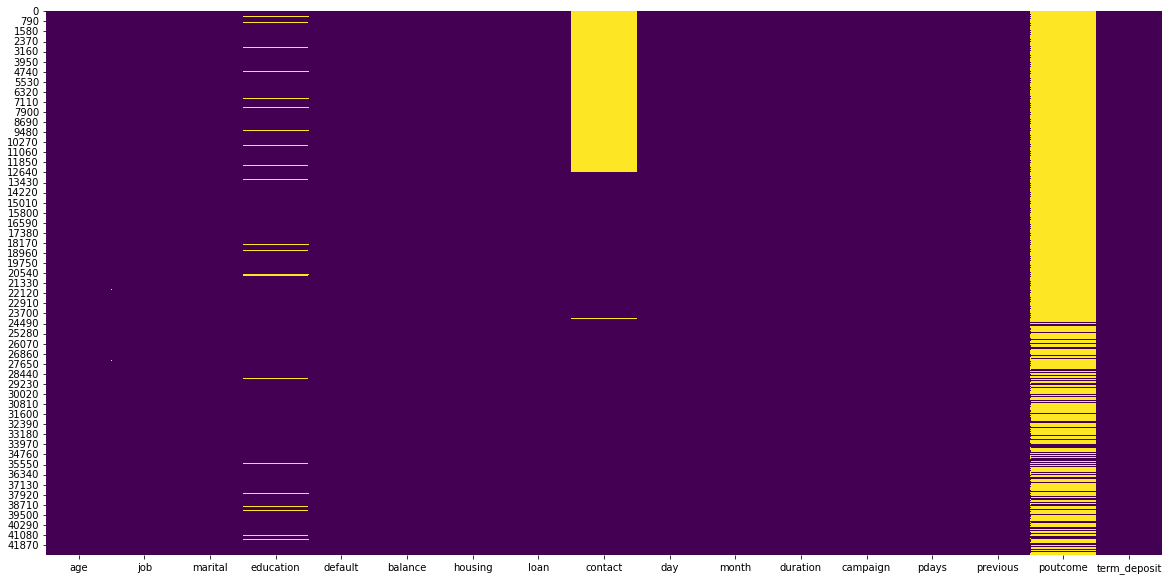

In [26]:
graphic('heatmap', bank, size=(20, 10))

### Porcentaje de datos nulos

In [27]:
labels = ['job', 'education', 'contact', 'poutcome']

for i in labels:
    print(f"El porcentaje de nulos de la columna {i!r} es: {bank[i].isnull().sum() / bank.shape[0] * 100}%")

El porcentaje de nulos de la columna 'job' es: 0.6191514810384858%
El porcentaje de nulos de la columna 'education' es: 3.9635075869509135%
El porcentaje de nulos de la columna 'contact' es: 29.963179249044302%
El porcentaje de nulos de la columna 'poutcome' es: 84.62909542906728%


## Tratamiento de NaN

Para las columnas `job`,`education` y `contact` es posible hacer un tratamiento para los nulos, pero para la columna `poutcome` cuyo porcentaje de nullos o unknows es demasiado alta, descartare dicha feature de mi dataset

In [28]:
bank_2 = bank.drop(columns='poutcome')

In [29]:
def impute_random(col, min, max):
    if pd.isna(col):
        return random.randint(min, max)
    else: 
        return col

In [30]:
bank_2['job'] = bank_2.apply(lambda x: impute_random(x['job'], 0, 10), axis=1)

In [31]:
bank_2['education'] = bank_2.apply(lambda x: impute_random(x['education'], 0, 2), axis=1)

In [32]:
bank_2['contact'] = bank_2.apply(lambda x: impute_random(x['contact'], 0, 1), axis=1)

In [33]:
labels = ['job', 'education', 'contact']

for i in labels:
    print(f"El porcentaje de nulos de la columna {i!r} es: {bank_2[i].isnull().sum() / bank_2.shape[0] * 100}%")

El porcentaje de nulos de la columna 'job' es: 0.0%
El porcentaje de nulos de la columna 'education' es: 0.0%
El porcentaje de nulos de la columna 'contact' es: 0.0%


In [34]:
bank_2.head()

age  job  marital  education  ...  campaign  pdays  previous  term_deposit
0   58  4.0        1        2.0  ...         1     -1         0             0
1   44  9.0        2        1.0  ...         1     -1         0             0
2   33  2.0        1        1.0  ...         1     -1         0             0
3   47  1.0        1        0.0  ...         1     -1         0             0
4   33  3.0        2        1.0  ...         1     -1         0             0

[5 rows x 16 columns]

### Mapa de calor datos nulos

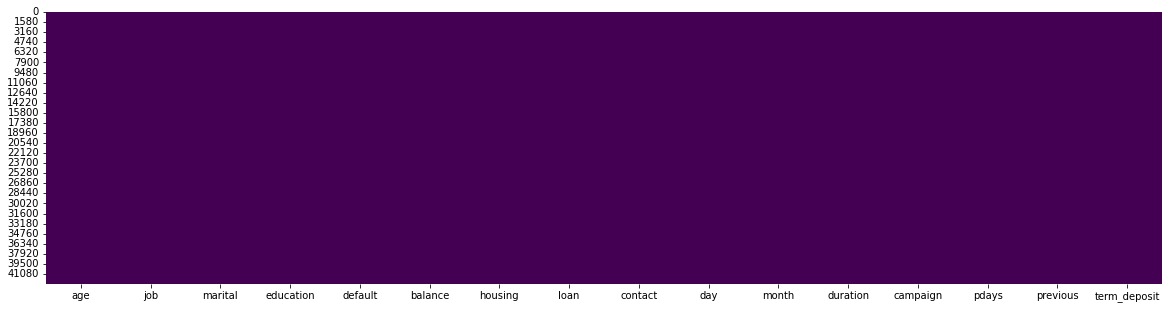

In [35]:
graphic('heatmap', bank_2, size=(20, 5))

### Histograma columnas con datos imputados

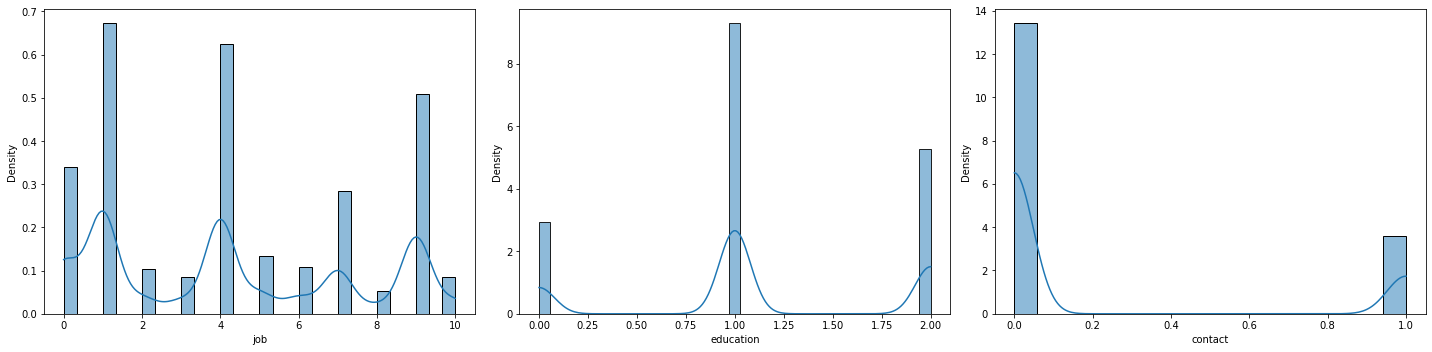

In [36]:
cols = 3
nrows = 1
fig, ax = plt.subplots(nrows, ncols=cols, figsize=(20, 5))

data = ['job', 'education', 'contact']

for i in range(cols):
    sns.histplot(bank_2[data[i]], ax=ax[i], kde=True, stat='density')

plt.tight_layout()

## Graficar la data

### Relación entre los datos teniendo en cuenta la feature `term_deposit`

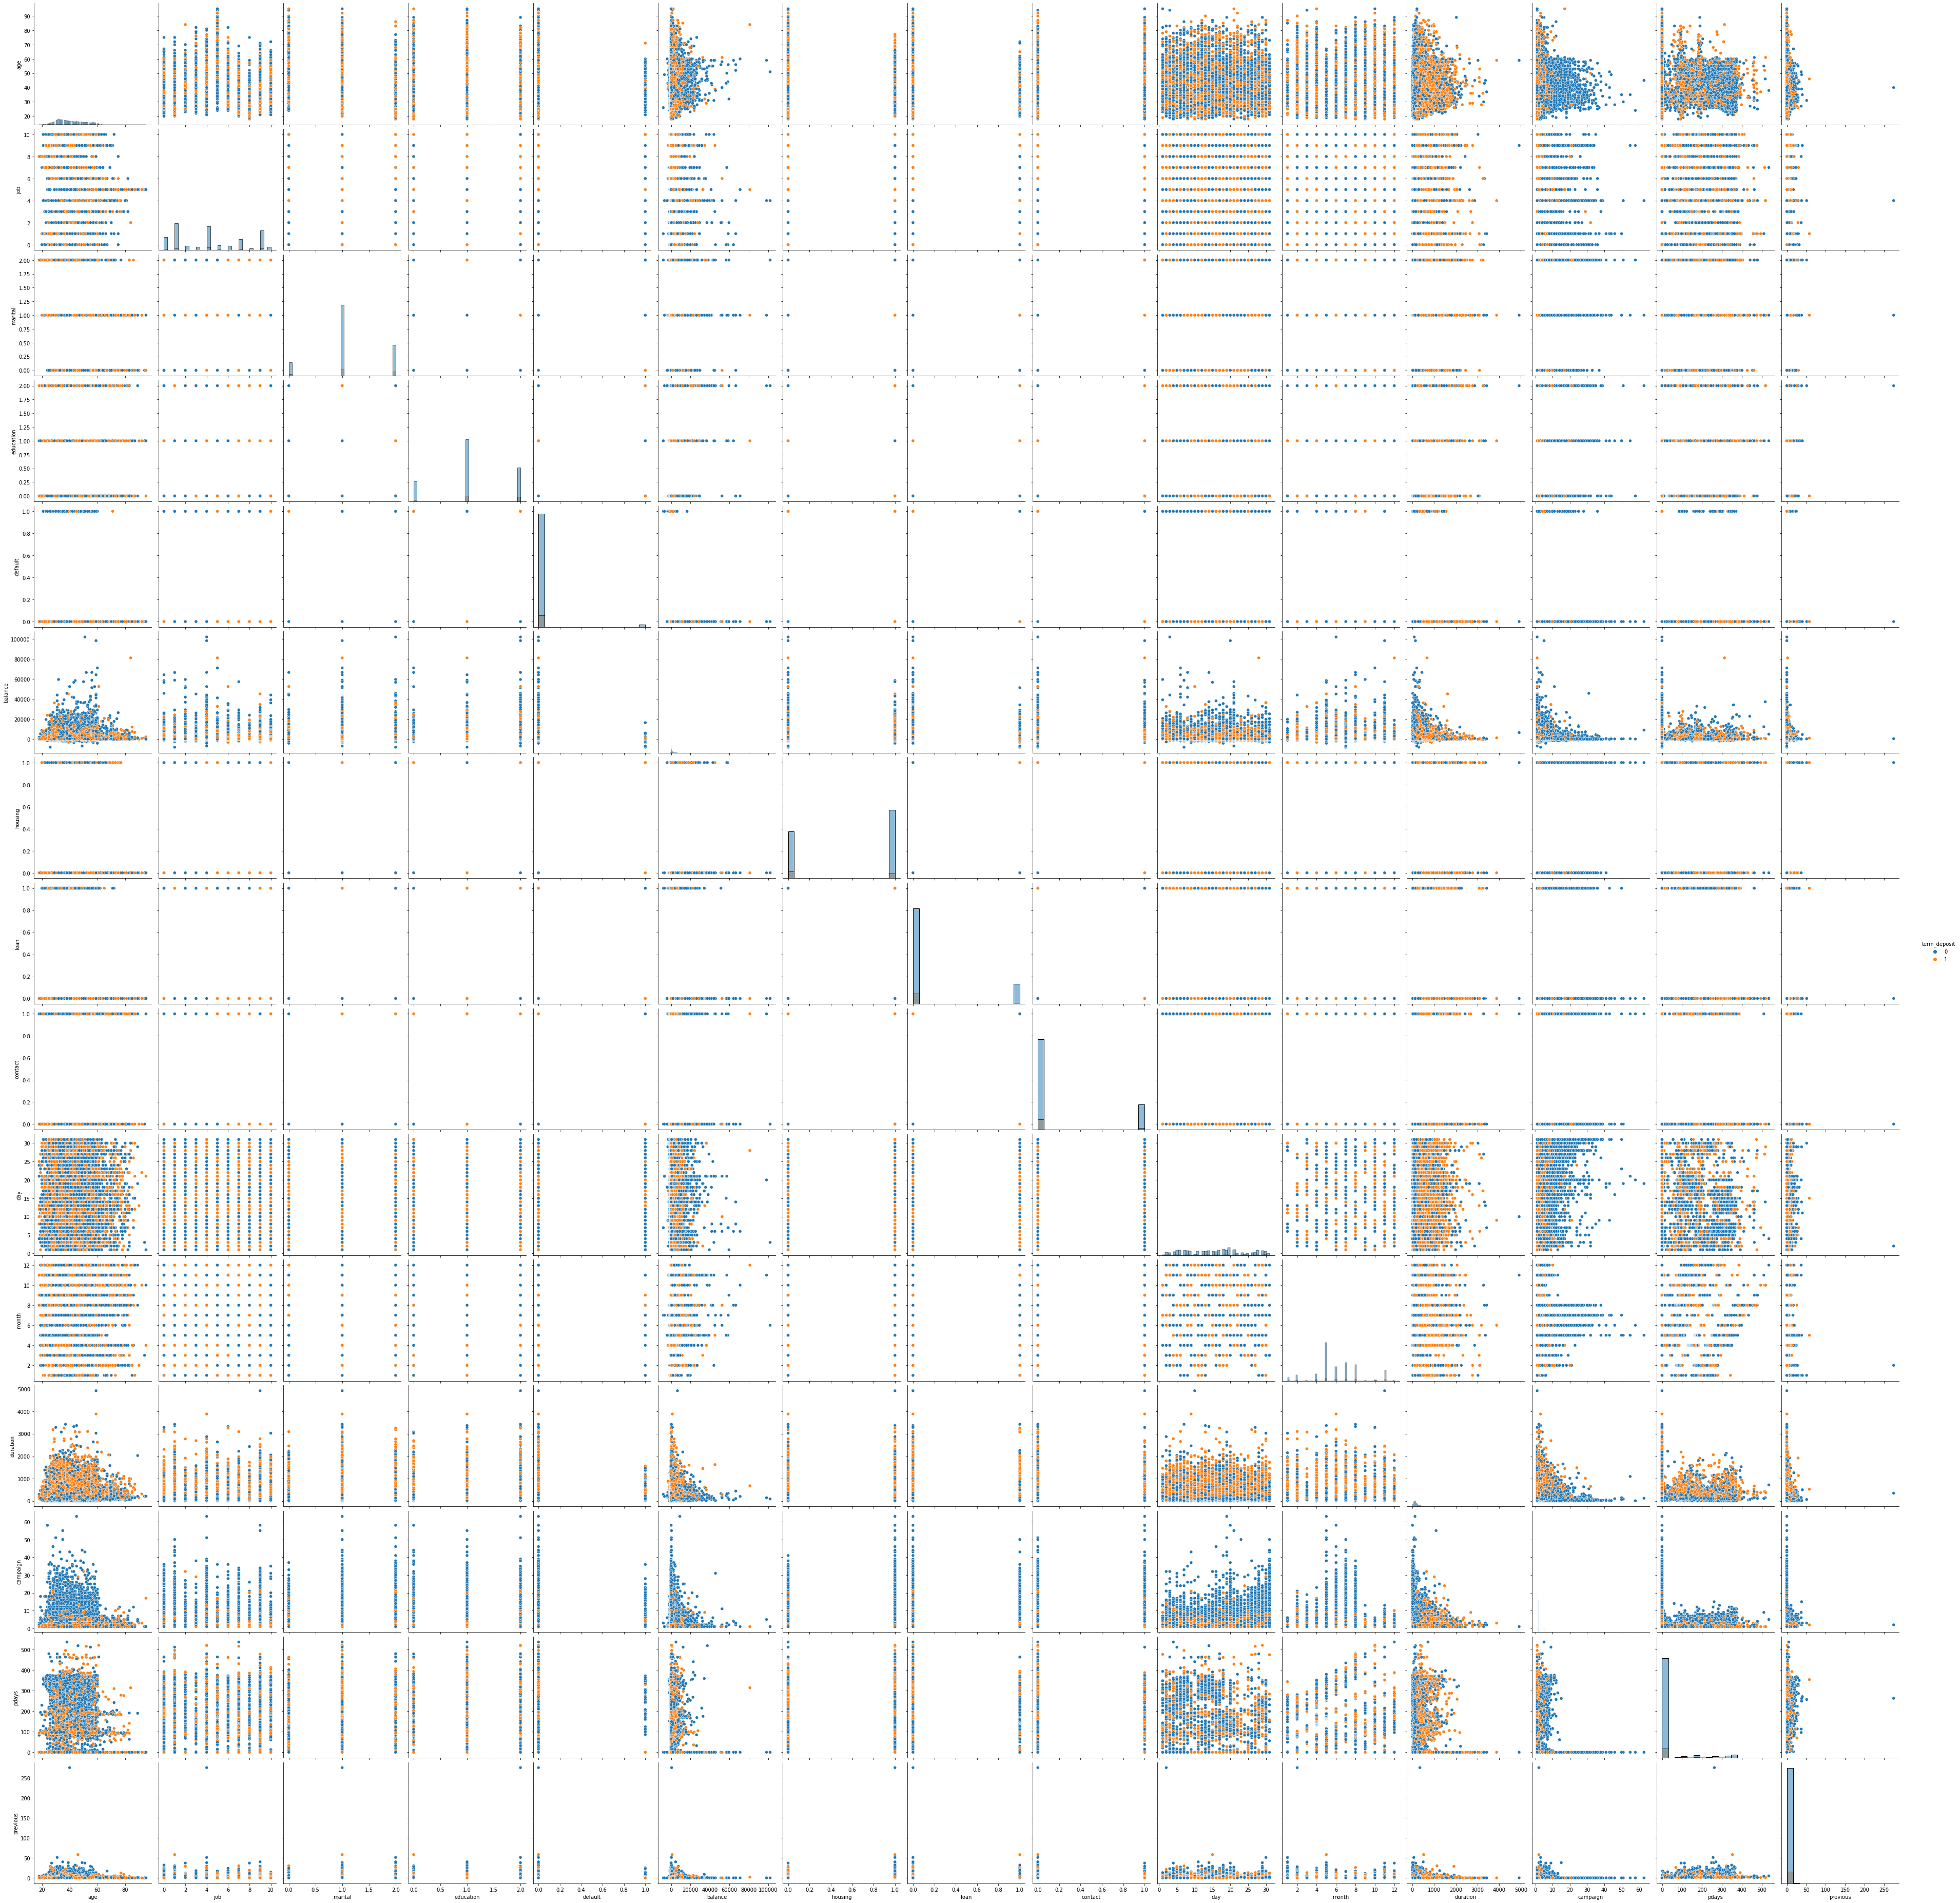

In [37]:
graphic('pairplot', bank_2, target='term_deposit')

### Correlación entre variables

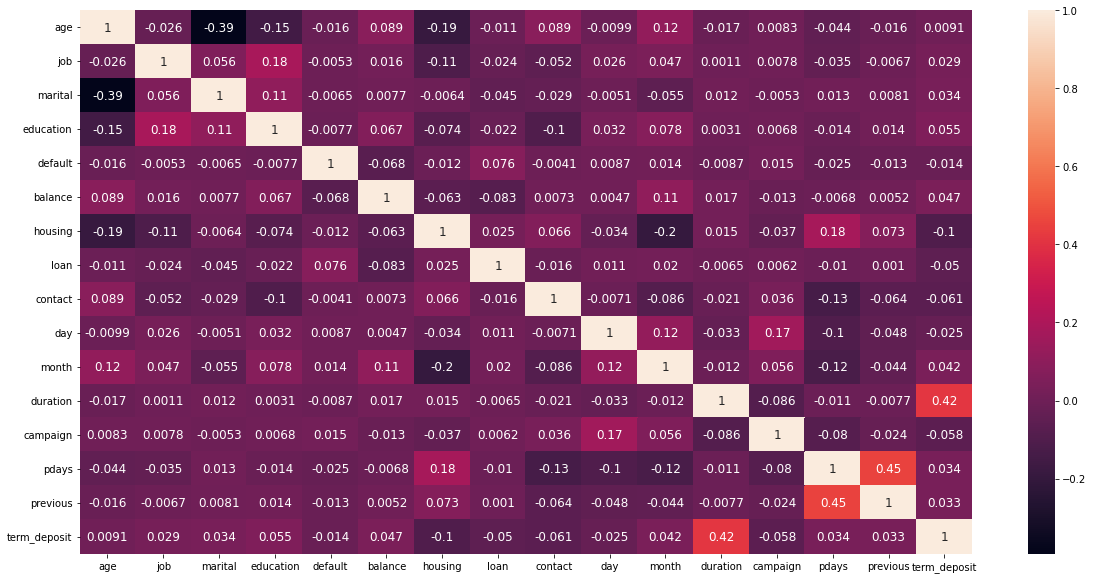

In [38]:
graphic('correlation', bank_2, size=(20, 10))

In [39]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])   
    df = pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
    return df

In [40]:
threshold = 0.40
m_corr = bank_2.corr()
corr_value = getCorrelatedFeature(m_corr['term_deposit'], threshold)
corr_value

Corr Value
duration        0.417468
term_deposit    1.000000

### Histograma para identificación de la densidad de ocurrencias

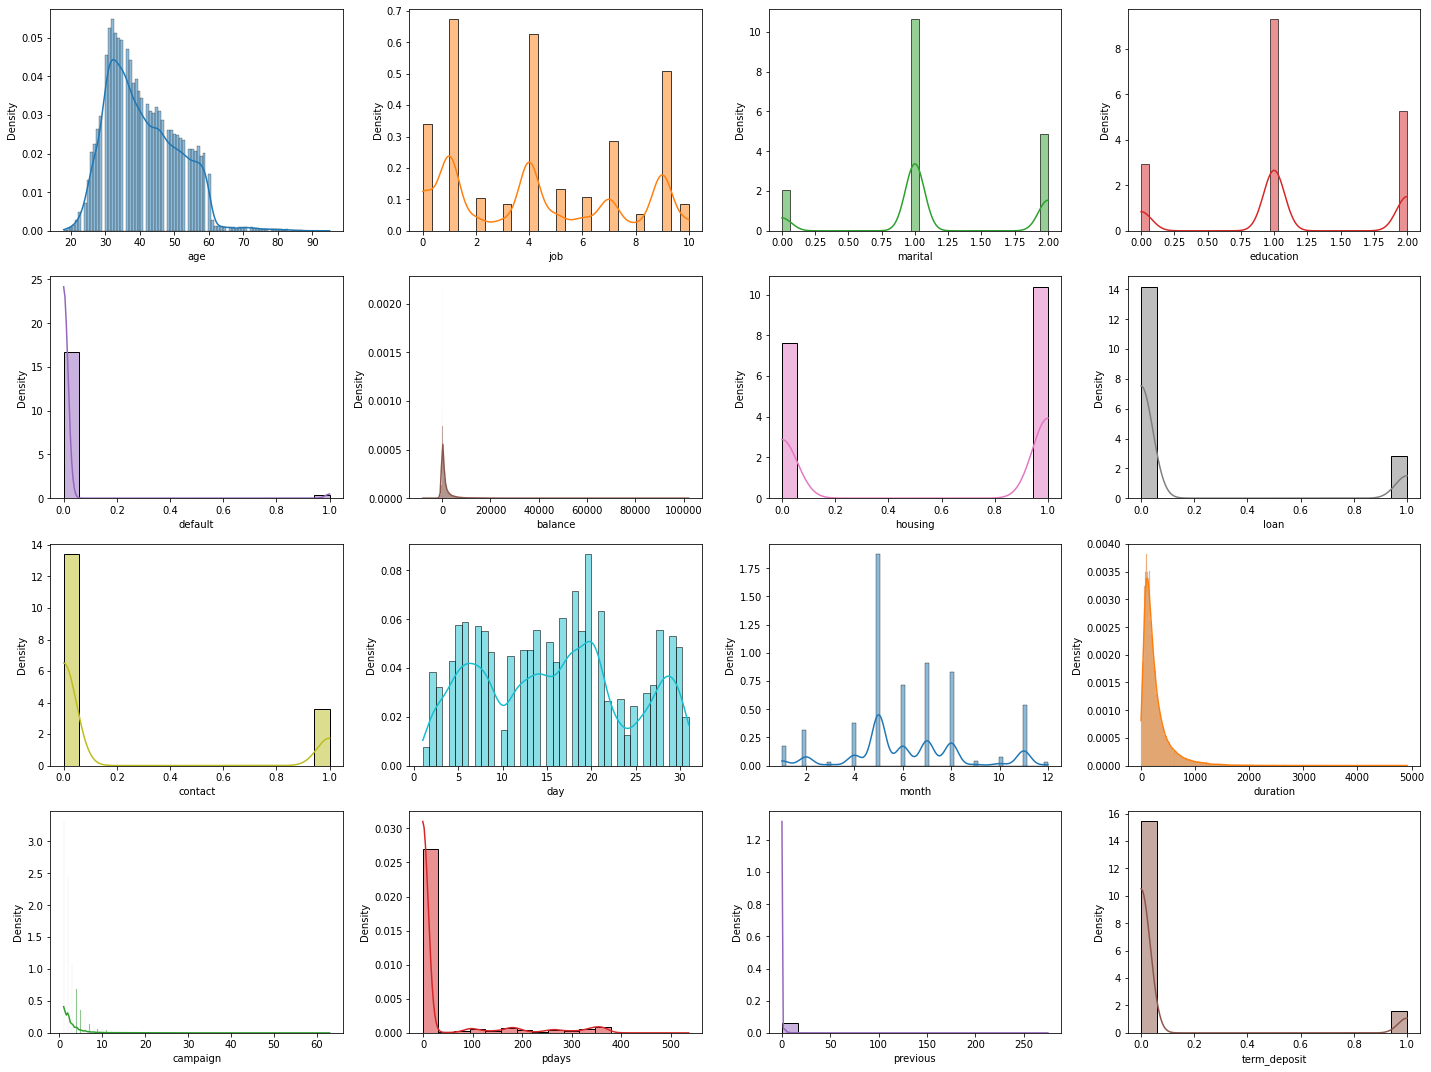

In [41]:
graphic('histplot', bank_2, bank_2.columns, ncols=4, nrows=4, size=(20, 15))

### Diagrama de cajas

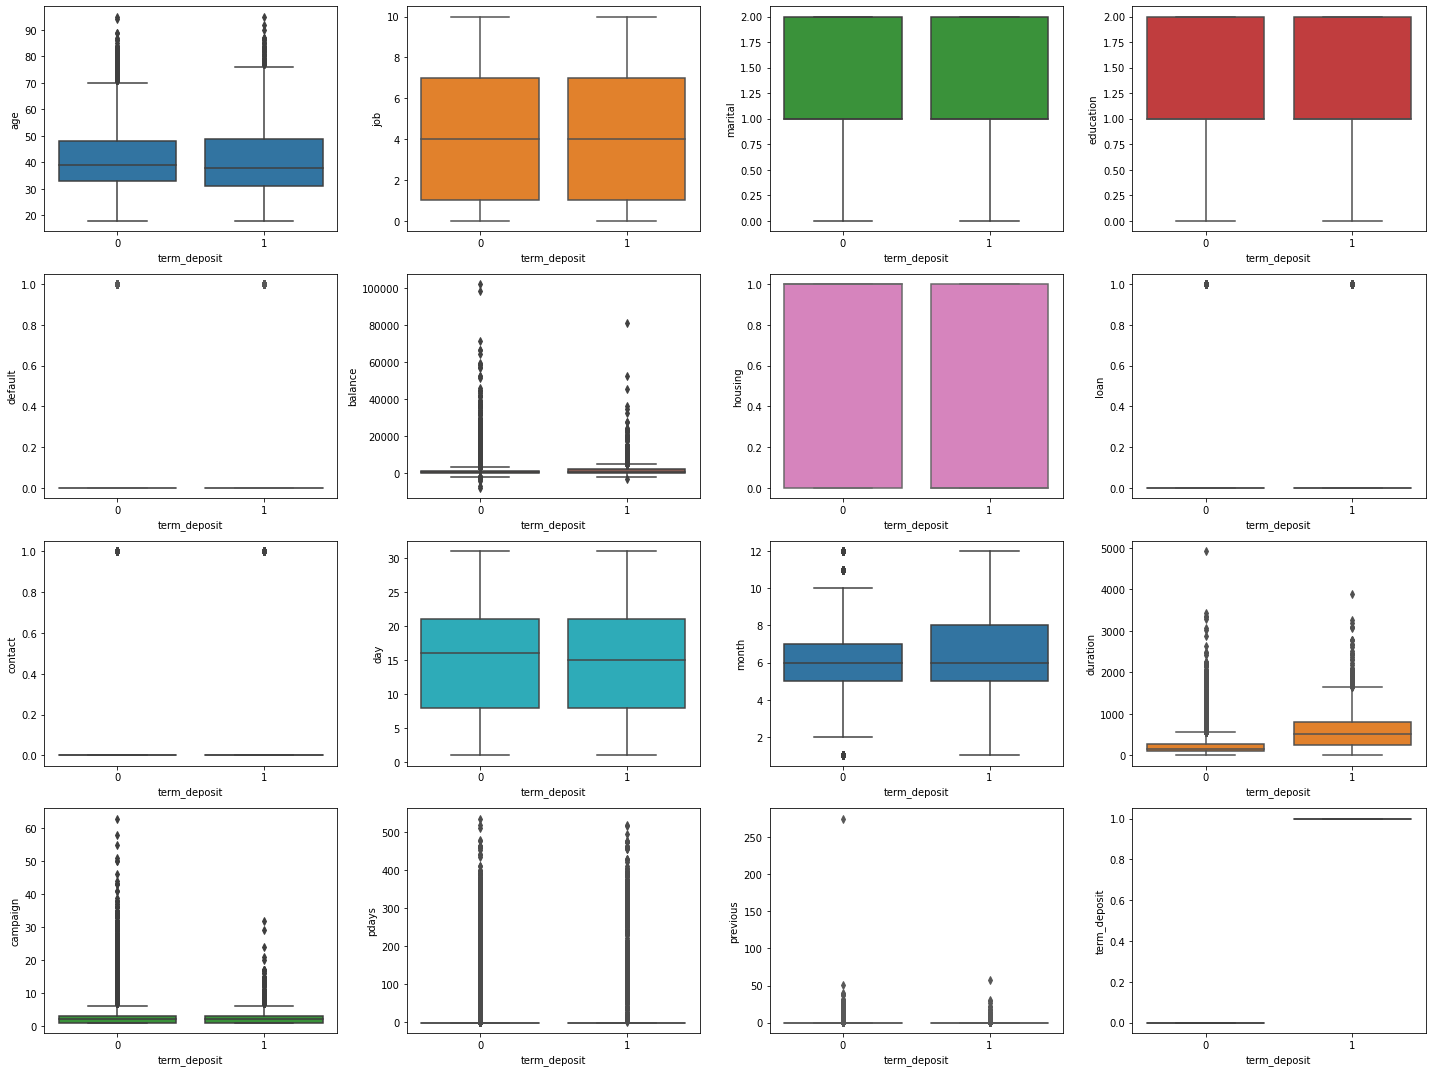

In [42]:
graphic('boxplot', bank_2, bank_2.columns, target='term_deposit', ncols=4, nrows=4, size=(20, 15))

### Diagrama de Barras

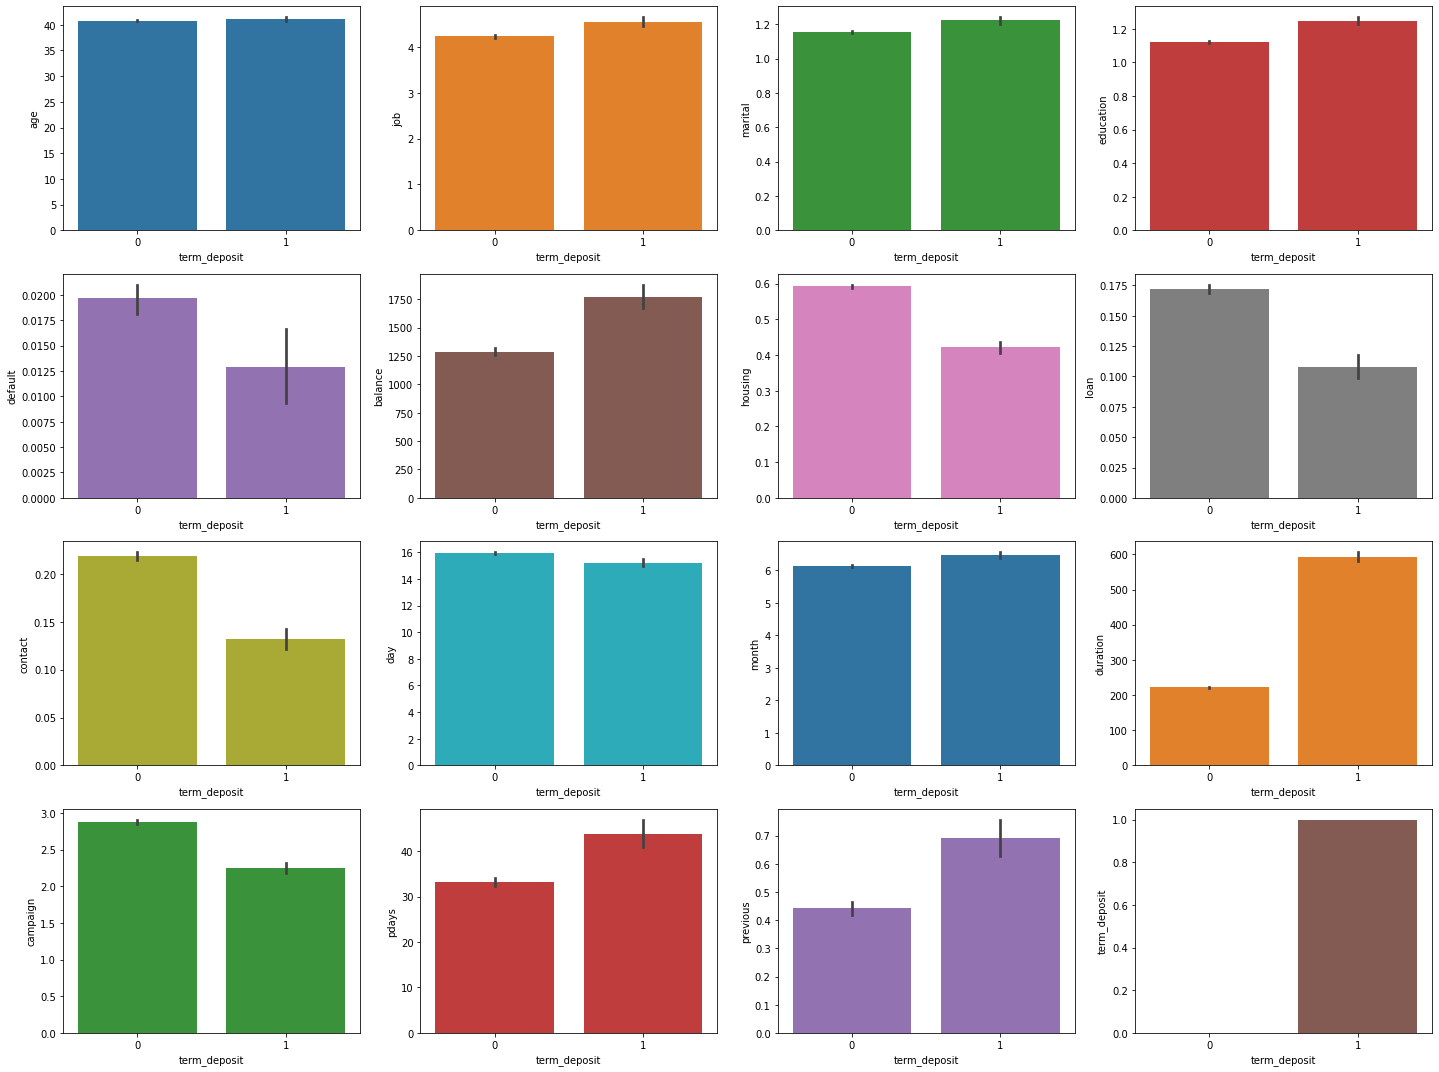

In [43]:
graphic('barplot', bank_2, bank_2.columns, target='term_deposit', ncols=4, nrows=4, size=(20, 15))

### Diagrama de Violin

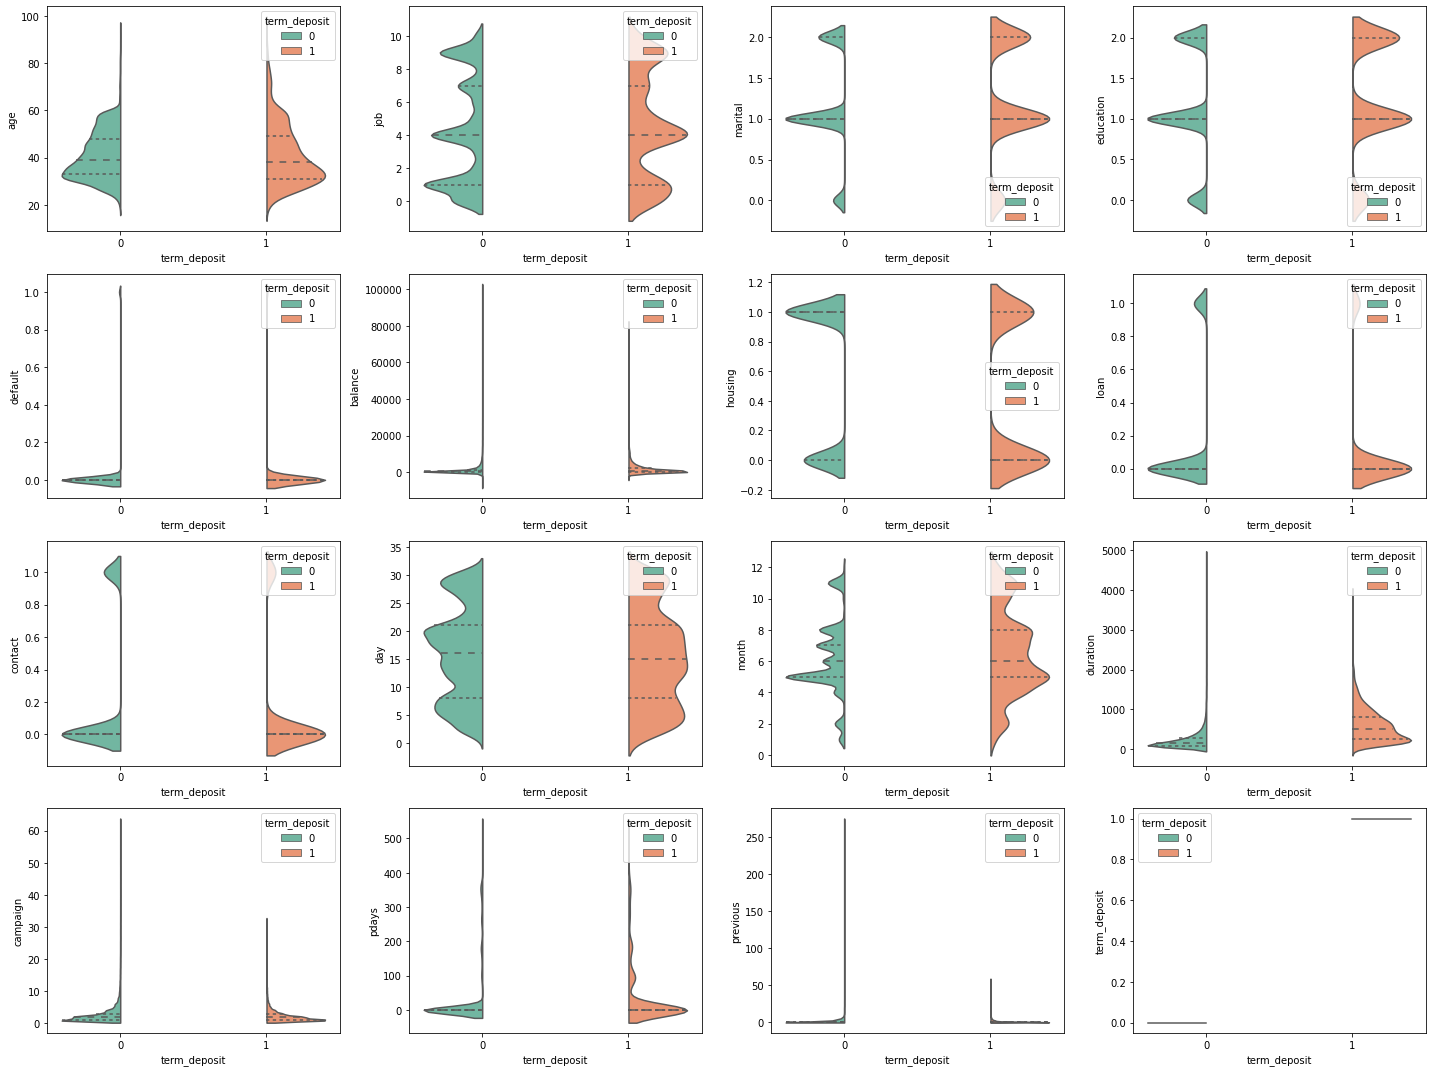

In [44]:
graphic('violinplot', bank_2, bank_2.columns, target='term_deposit', ncols=4, nrows=4, size=(20, 15))

### Cantidad de ocurrencias de `term_deposit`

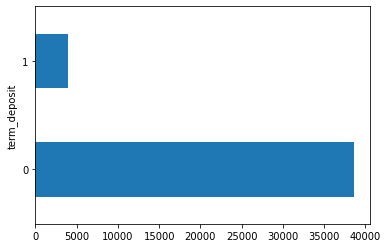

In [45]:
bank_2.groupby('term_deposit').size().plot.barh()

## Separar la Data

In [46]:
x = bank_2.drop(columns='term_deposit')
y = bank_2['term_deposit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
x_train.shape

(34111, 15)

In [48]:
y_train.shape

(34111,)

In [49]:
x_test.shape

(8528, 15)

In [50]:
y_test.shape

(8528,)

## Mejor profundidad, neighbors o estimator para precisión

In [51]:
def best_step(model_name, min=1, max=30, size=(15, 10)):
    global model
    max_step_list = list(range(min, max))
    accuracy = []

    for step in max_step_list:
        if model_name == 'Tree Classifier':
            model = DecisionTreeClassifier(max_depth=step, random_state=42)
        elif model_name == 'KNN':
            model = KNeighborsClassifier(n_neighbors=step)
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(n_estimators=step, random_state=42)
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        accuracy.append(score)

    fig, ax = plt.subplots(figsize=size)
    plt.plot(max_step_list, accuracy)
    plt.ylabel('accuracy')
    plt.xlabel('step')
    plt.grid(True)
    plt.show()
    return max_step_list, accuracy

## Establecer Modelo de ML

### Funciones para entramiento y precisión del modelo

In [52]:
def train_model(model_name, step=5):
    if model_name == 'LR':
        model = LogisticRegression(max_iter=4000)
    elif model_name == 'DTC':
        model = DecisionTreeClassifier(max_depth=step, random_state=42)
    elif model_name == 'SVM':
        model = SVC()
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=step)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=step, random_state=42)
    model.fit(x_train, y_train)
    return model

In [53]:
def predict_model(model):
    y_pred = model.predict(x_test)
    score_train = (model.score(x_train, y_train)) * 100
    score_test = (model.score(x_test, y_test)) * 100
    accuracy_predic = (accuracy_score(y_test, y_pred)) * 100
    score_predic = (precision_score(y_test, y_pred)) * 100

    print('Precisión de entrenamiento: {:.4f}%'.format(score_train))
    print('Precisión de testeo: {:.4f}%'.format(score_test))
    print('Exactitud de la predicción: {:.4f}%'.format(accuracy_predic))
    print('Precisión de la predicción: {:.4f}%'.format(score_predic))
    print("\n\n")

    print(classification_report(y_test, y_pred), "\n\n")
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt_cm(conf_mat=cm, figsize=(5, 5))
    plt.title('Relative ratios between actual class and predicted class')

    return score_train, score_test, accuracy_predic, score_predic

### Modelo de Regresión Logistica

In [54]:
lr = train_model('LR')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Precisión de entrenamiento: 91.2492%
Precisión de testeo: 91.0530%
Exactitud de la predicción: 91.0530%
Precisión de la predicción: 57.4297%



              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7728
           1       0.57      0.18      0.27       800

    accuracy                           0.91      8528
   macro avg       0.75      0.58      0.61      8528
weighted avg       0.89      0.91      0.89      8528
 




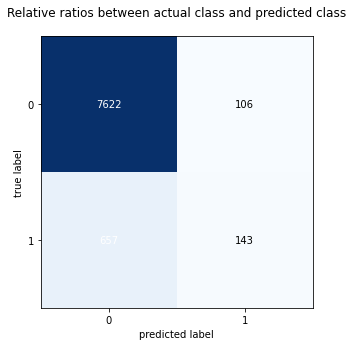

In [55]:
score_train_lr, score_test_lr, accuracy_predict_lr, score_predic_lr = predict_model(lr)

### Modelo de Árboles de Decisión de Clasificación

#### Gráfica de Precisión

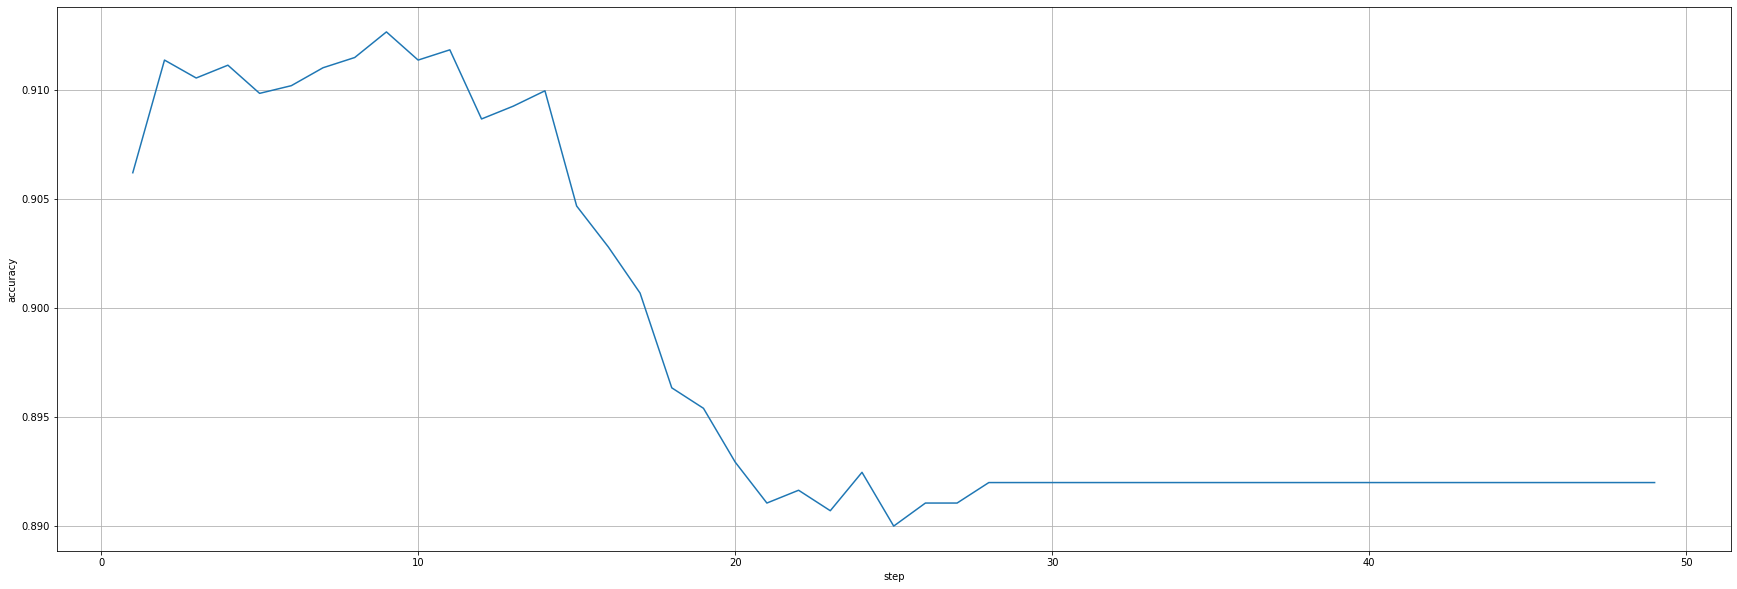

In [56]:
max_step_list, accuracy = best_step('Tree Classifier', max=50, size=(30, 10))

In [57]:
best = [x for x in accuracy]
optimal_depth = max_step_list[best.index(max(best))]
print(f'El mejor parámetro para el modelo es de {optimal_depth} con una precisión de {max(best)}')

El mejor parámetro para el modelo es de 9 con una precisión de 0.912640712945591


#### Modelo

In [58]:
dtc = train_model('DTC', step=optimal_depth)

Precisión de entrenamiento: 92.9026%
Precisión de testeo: 91.2641%
Exactitud de la predicción: 91.2641%
Precisión de la predicción: 55.1210%



              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7728
           1       0.55      0.37      0.44       800

    accuracy                           0.91      8528
   macro avg       0.74      0.67      0.70      8528
weighted avg       0.90      0.91      0.90      8528
 




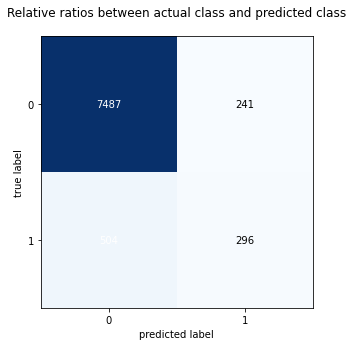

In [59]:
score_train_dtc, score_test_dtc, accuracy_predict_dtc, score_predic_dtc = predict_model(dtc)

In [60]:
print(f'Profundidad del modelo: {dtc.get_depth()}')
print(f'Número de nodos terminales: {dtc.get_n_leaves()}')

Profundidad del modelo: 9
Número de nodos terminales: 250


### Modelo de Support Vector Machine

In [61]:
svm = train_model('SVM')

Precisión de entrenamiento: 90.7420%
Precisión de testeo: 90.6426%
Exactitud de la predicción: 90.6426%
Precisión de la predicción: 57.1429%



              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7728
           1       0.57      0.01      0.02       800

    accuracy                           0.91      8528
   macro avg       0.74      0.50      0.49      8528
weighted avg       0.88      0.91      0.86      8528
 




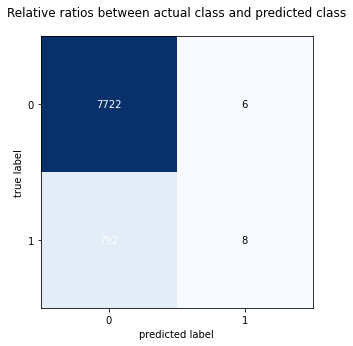

In [62]:
score_train_svm, score_test_svm, accuracy_predict_svm, score_predic_svm = predict_model(svm)

### Modelo de K-NeighborsClassifier

#### Gráfica de Precisión

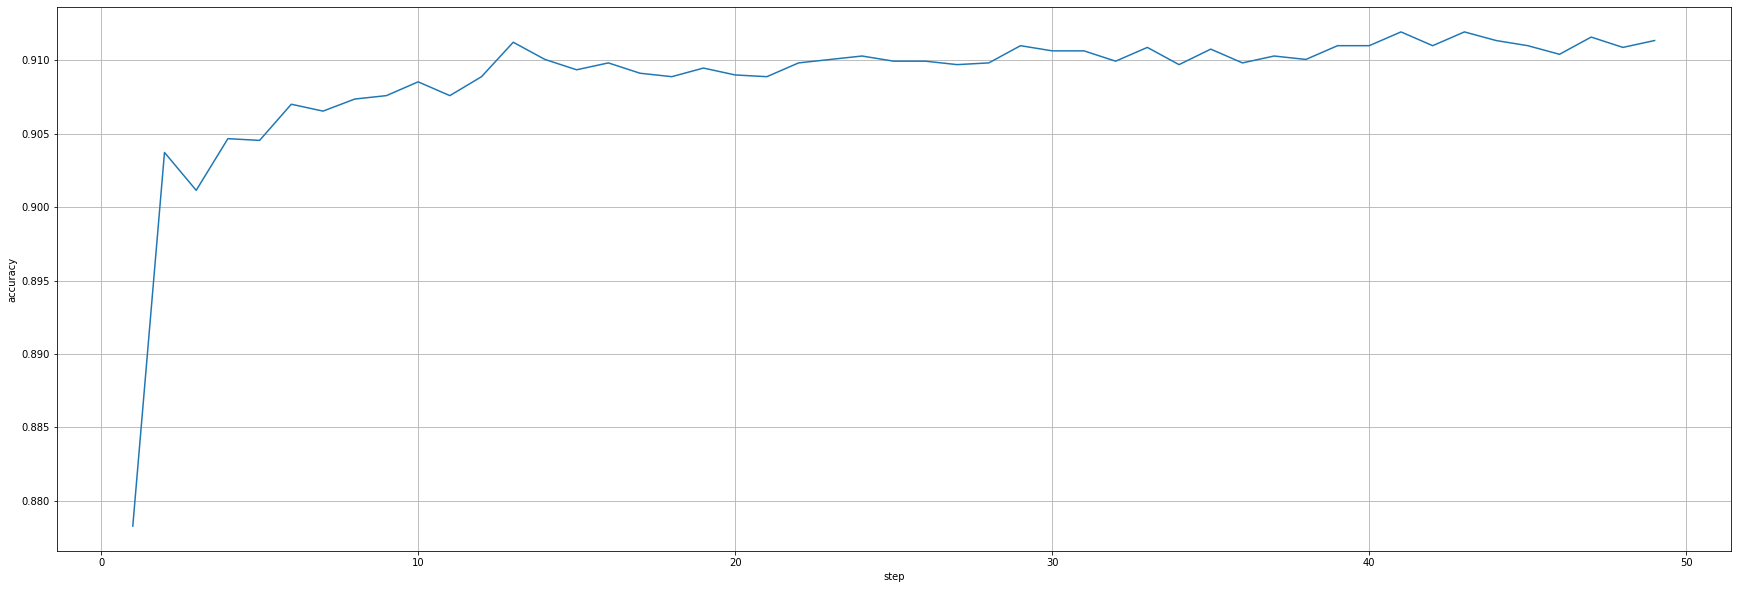

In [63]:
max_steps_list, accuracy = best_step('KNN', max=50, size=(30, 10))

In [64]:
best = [x for x in accuracy]
optimal_neighbors = max_step_list[best.index(max(best))]
print(f'El mejor parámetro para el modelo es de {optimal_neighbors} con una precisión de {max(best)}')

El mejor parámetro para el modelo es de 41 con una precisión de 0.911937148217636


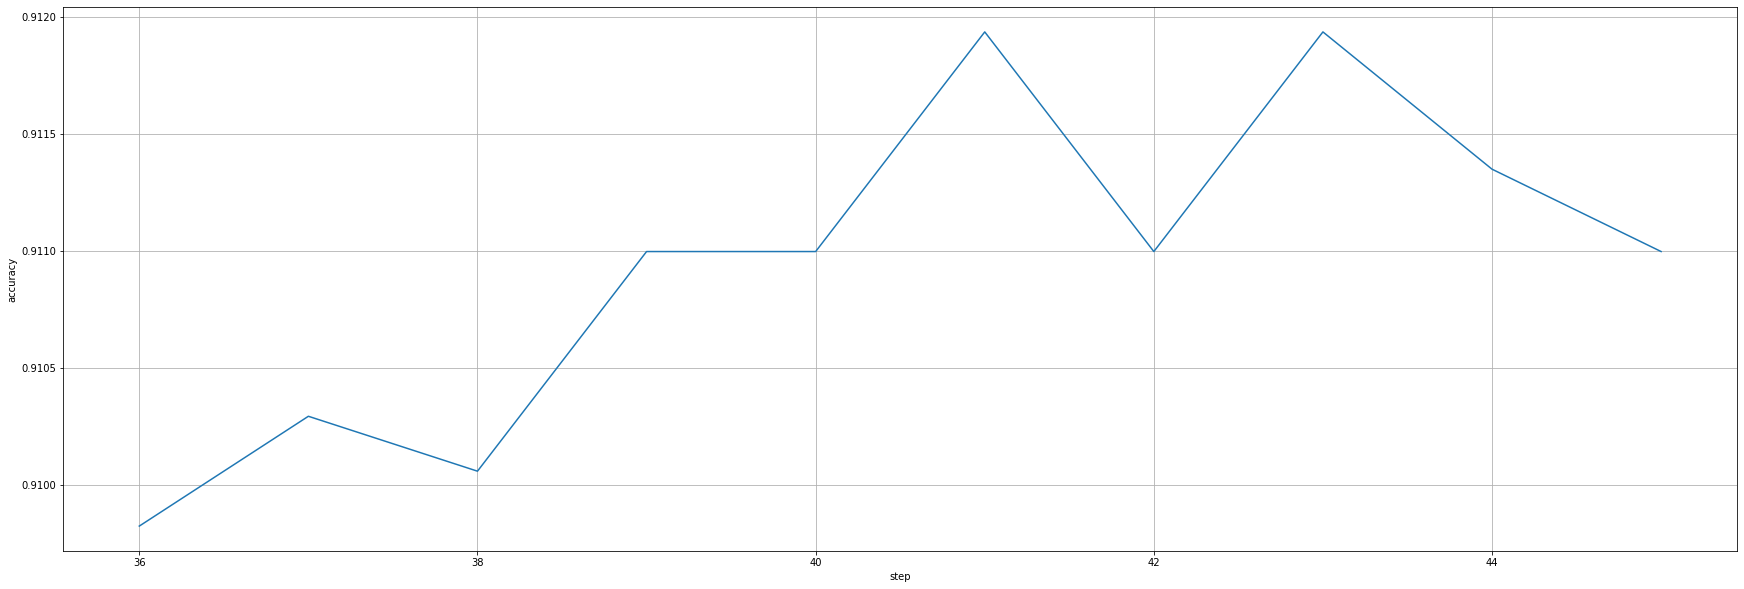

([36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
 [0.9098264540337712,
  0.9102954971857411,
  0.9100609756097561,
  0.9109990619136961,
  0.9109990619136961,
  0.911937148217636,
  0.9109990619136961,
  0.911937148217636,
  0.9113508442776735,
  0.9109990619136961])

In [65]:
best_step('KNN', min=(optimal_neighbors-5), max=(optimal_neighbors+5), size=(30, 10))

#### Modelo

In [66]:
knn = train_model('KNN', step=optimal_neighbors)

Precisión de entrenamiento: 91.2902%
Precisión de testeo: 91.1937%
Exactitud de la predicción: 91.1937%
Precisión de la predicción: 59.3870%



              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7728
           1       0.59      0.19      0.29       800

    accuracy                           0.91      8528
   macro avg       0.76      0.59      0.62      8528
weighted avg       0.89      0.91      0.89      8528
 




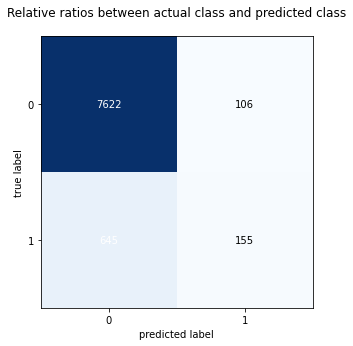

In [67]:
score_train_knn, score_test_knn, accuracy_predict_knn, score_predic_knn = predict_model(knn)

## Random Forest Classifier

### Diagrama de Precisión

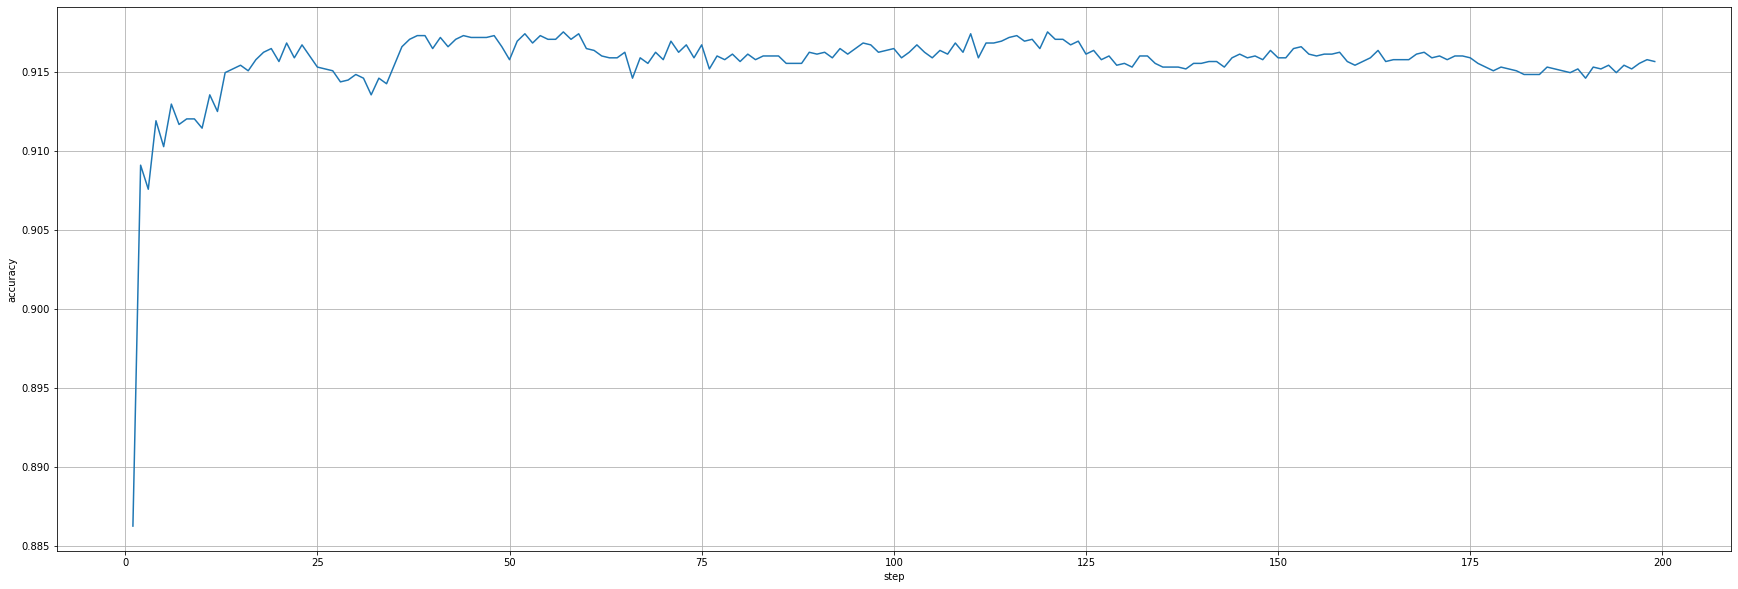

In [68]:
max_steps_list, accuracy = best_step('Random Forest', max=200, size=(30, 10))

In [73]:
best = [x for x in accuracy]
optimal_estimator = max_steps_list[best.index(max(best))]
print(f'El mejor parámetro para el modelo es de {optimal_estimator} con una precisión de {max(best)}')

El mejor parámetro para el modelo es de 57 con una precisión de 0.9175656660412758


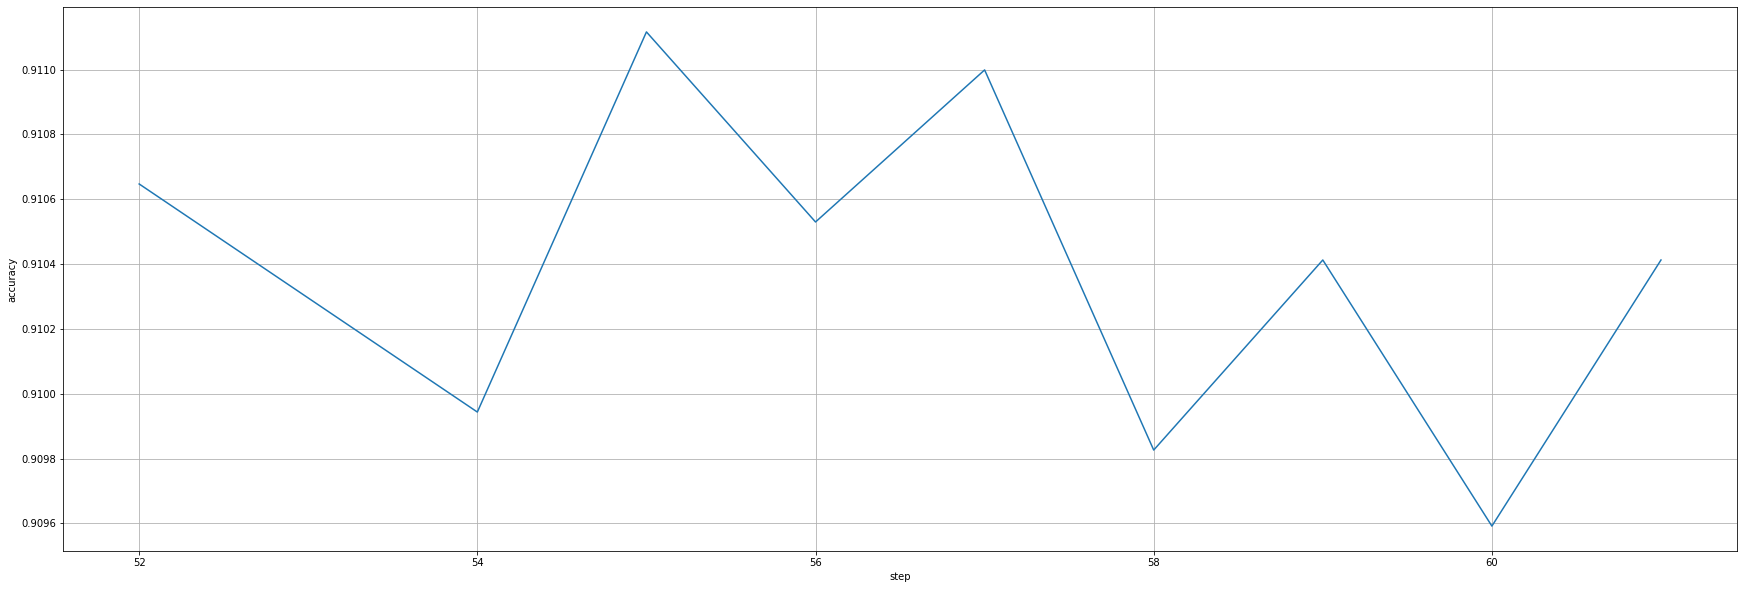

([52, 53, 54, 55, 56, 57, 58, 59, 60, 61],
 [0.9106472795497186,
  0.9102954971857411,
  0.9099437148217636,
  0.9111163227016885,
  0.9105300187617261,
  0.9109990619136961,
  0.9098264540337712,
  0.9104127579737336,
  0.9095919324577861,
  0.9104127579737336])

In [74]:
best_step('KNN', min=(optimal_estimator-5), max=(optimal_estimator+5), size=(30, 10))

### Modelo

In [75]:
rfc = train_model('Random Forest', step=optimal_estimator)

Precisión de entrenamiento: 99.9912%
Precisión de testeo: 91.7566%
Exactitud de la predicción: 91.7566%
Precisión de la predicción: 61.3583%



              precision    recall  f1-score   support

           0       0.93      0.98      0.96      7728
           1       0.61      0.33      0.43       800

    accuracy                           0.92      8528
   macro avg       0.77      0.65      0.69      8528
weighted avg       0.90      0.92      0.91      8528
 




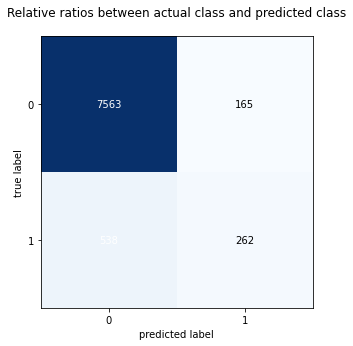

In [76]:
score_train_rfc, score_test_rfc, accuracy_predict_rfc, score_predic_rfc = predict_model(rfc)

## Resumen de los modelos

In [77]:
summary = pd.DataFrame()

In [78]:
modelos = ['Logistic Regression', 'Decision Tree Classifier', 'Support Vector Machine', 'KNeighbors Classifier', 'Random Forest Classifier']
precision_entrenamiento = [score_train_lr, score_train_dtc, score_train_svm, score_train_knn, score_train_rfc]
precision_testeo = [score_test_lr, score_test_dtc, score_test_svm, score_test_knn, score_test_rfc]
exactitud_prediccion = [accuracy_predict_lr, accuracy_predict_dtc, accuracy_predict_svm, accuracy_predict_knn, accuracy_predict_rfc]
precision_prediccion = [score_predic_lr, score_predic_dtc, score_predic_svm, score_predic_knn, score_predic_rfc]

In [79]:
summary['Modelos'] = modelos
summary['Precisión del entrenamiento'] = precision_entrenamiento
summary['Precisión del testeo'] = precision_testeo
summary['Exactitud de la prediccion'] = exactitud_prediccion
summary['Precision de la predicción'] = precision_prediccion

In [80]:
summary

Modelos  ...  Precision de la predicción
0       Logistic Regression  ...                   57.429719
1  Decision Tree Classifier  ...                   55.121043
2    Support Vector Machine  ...                   57.142857
3     KNeighbors Classifier  ...                   59.386973
4  Random Forest Classifier  ...                   61.358314

[5 rows x 5 columns]

## StandardScaler de sklearn

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Best parameter con cross-validation

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
def mse_best_step(model_name, min=1, max=30, size=(15, 10)):
    global model
    max_step_list = list(range(min, max))
    cv_scores = []

    for step in max_step_list:
        if model_name == 'DTC':
            model = DecisionTreeClassifier(max_depth=step, random_state=42)
        elif model_name == 'KNN':
            model = KNeighborsClassifier(n_neighbors=step)
        score = cross_val_score(model, x_scaled, y, cv=10, scoring='accuracy')
        cv_scores.append(score.mean())

    MSE = [1 - x for x in cv_scores]
    fig, ax = plt.subplots(figsize=size)
    plt.plot(max_step_list, MSE)
    plt.ylabel('error')
    plt.xlabel('step')
    plt.title(f'Variation of error with changing step in {model_name}')
    plt.grid(True)
    plt.show()
    return max_step_list, cv_scores

### KNN con StandardScaler

#### Gráfica del menor error

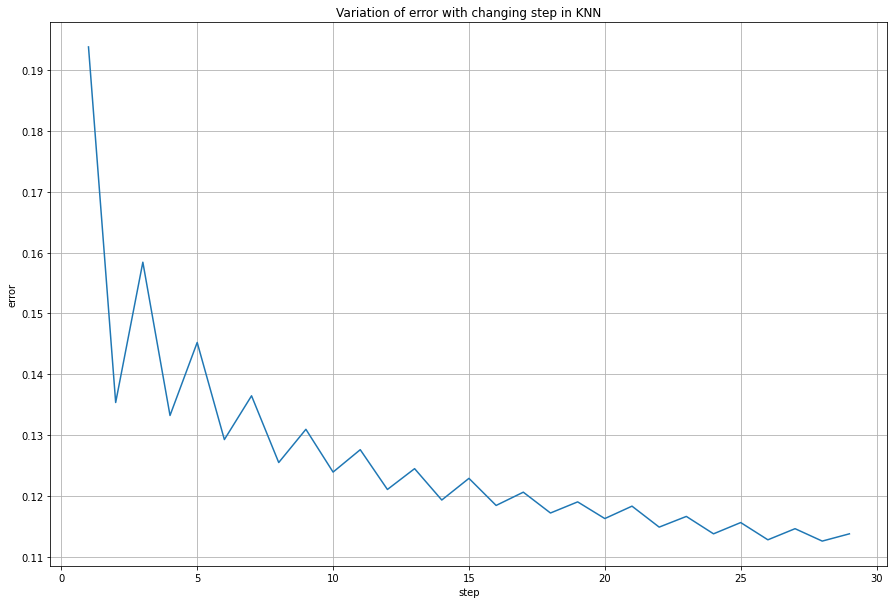

In [86]:
max_step_list, cv_scores = mse_best_step('KNN', max=30)

In [87]:
MSE = [1 - x for x in cv_scores]
optimal_step = max_step_list[MSE.index(min(MSE))]

In [88]:
print('The optimal number of k is: ', optimal_step)

The optimal number of k is:  28


#### Creación del modelo

Precisión de entrenamiento: 91.5101%
Precisión de testeo: 90.9240%
Exactitud de la predicción: 90.9240%
Precisión de la predicción: 55.2941%



              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7736
           1       0.55      0.12      0.20       792

    accuracy                           0.91      8528
   macro avg       0.73      0.55      0.57      8528
weighted avg       0.88      0.91      0.88      8528
 




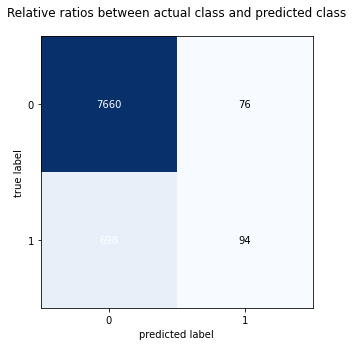

In [92]:
knn_scaler = train_model('KNN', step=optimal_step)
score_train_knn_scaler, score_test_knn_scaler, accuracy_predict_knn_scaler, score_predic_knn_scaler = predict_model(knn_scaler)

### DTC con StandardScaler

#### Gráfica del menor error

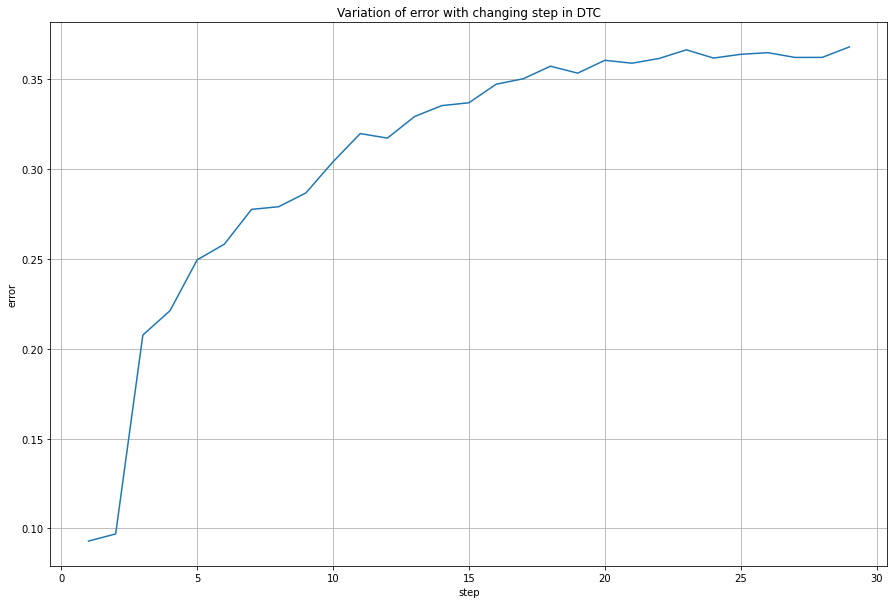

In [93]:
max_step_list, cv_scores = mse_best_step('DTC', max=30)

In [95]:
MSE = [1 - x for x in cv_scores]
optimal_step = max_step_list[MSE.index(min(MSE))]
print('The optimal number of k is: ', optimal_step)

The optimal number of k is:  1


#### Modelo

Precisión de entrenamiento: 100.0000%
Precisión de testeo: 88.9306%
Exactitud de la predicción: 88.9306%
Precisión de la predicción: 39.2045%



              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7736
           1       0.39      0.35      0.37       792

    accuracy                           0.89      8528
   macro avg       0.66      0.65      0.65      8528
weighted avg       0.88      0.89      0.89      8528
 




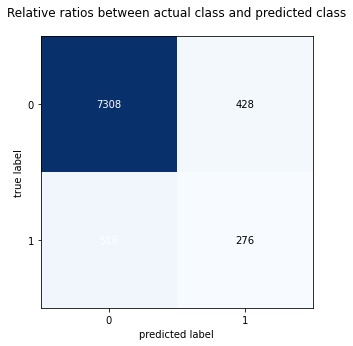

In [96]:
dtc_scaler = train_model('KNN', step=optimal_step)
score_train_dtc_scaler, score_test_dtc_scaler, accuracy_predict_dtc_scaler, score_predic_dtc_scaler = predict_model(dtc_scaler)

## Reporte de Resultados

In [97]:
modelos.append('KNN con StandardScaler')
precision_entrenamiento.append(score_train_knn_scaler)
precision_testeo.append(score_test_knn_scaler)
exactitud_prediccion.append(accuracy_predict_knn_scaler)
precision_prediccion.append(score_predic_knn_scaler)

modelos.append('Decision Tree Classifier con StandardScaler')
precision_entrenamiento.append(score_train_dtc_scaler)
precision_testeo.append(score_test_dtc_scaler)
exactitud_prediccion.append(accuracy_predict_dtc_scaler)
precision_prediccion.append(score_predic_dtc_scaler)

In [98]:
summary_2 = pd.DataFrame()

In [99]:
summary_2['Modelos'] = modelos
summary_2['Precisión del entrenamiento'] = precision_entrenamiento
summary_2['Precisión del testeo'] = precision_testeo
summary_2['Exactitud de la prediccion'] = exactitud_prediccion
summary_2['Precision de la predicción'] = precision_prediccion

In [100]:
summary_2

Modelos  ...  Precision de la predicción
0                          Logistic Regression  ...                   57.429719
1                     Decision Tree Classifier  ...                   55.121043
2                       Support Vector Machine  ...                   57.142857
3                        KNeighbors Classifier  ...                   59.386973
4                     Random Forest Classifier  ...                   61.358314
5                       KNN con StandardScaler  ...                   55.294118
6  Decision Tree Classifier con StandardScaler  ...                   39.204545

[7 rows x 5 columns]

## Conclusiones

Debemos partir con el hecho de que en las gráficas iniciales se presenta una notable diferencia en la cantidad de datos que se asignan para las 2 clasificaciones de la target feature, en este caso `term_deposit`. Esto afecta en el resultado final del entrenamiento, puesto que la separación de los datos se sesga a favor del label `0`, esto hace que los porcentajes de precisión y exactitud para el entrenamiento y testeo sean altos, pero cuando se ingresan nuevos valores para la predicción, dichos resultados presentan un cambio dramatico en cuanto a precisión. 

En cada `clasification_report` de los modelos se observa que la precisión del modelo es superior al $90$% para el resultado `0`, pero para el label de `1`, los valores no logran superar el $60$%. Por lo tanto el modelo esta sobreajustado para predecir resultados de `no aceptar un depósito a plazo`.

En consideración, el modelo presentan un problema de over-fitting y no resulta ser muy fiable para una predicción adecuada.